# Startup Profit Prediction

## Author: Spriha Ghosh

In [2]:
import numpy as np # linear algebra
import pandas as pd # data processing 

# Input data files are available in the read-only "../input/" directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

In [3]:
import seaborn as sb
from sklearn import preprocessing 
from scipy import stats
from statsmodels.stats.outliers_influence import variance_inflation_factor
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor

In [4]:
df = pd.read_csv('../input/50-startups-data/50_Startups.csv')
df.head()

,R&D Spend,Administration,Marketing Spend,State,Profit
0,165349.20,136897.80,471784.10,New York,192261.83
1,162597.70,151377.59,443898.53,California,191792.06
2,153441.51,101145.55,407934.54,Florida,191050.39
3,144372.41,118671.85,383199.62,New York,182901.99
4,142107.34,91391.77,366168.42,Florida,166187.94


In [5]:
# but, we need to encode 'State' attribute
label_encoder = preprocessing.LabelEncoder()  # encoding data

In [6]:
df['State'] = df['State'].astype('|S')
df['State'] = label_encoder.fit_transform(df['State'])
df.head()

,R&D Spend,Administration,Marketing Spend,State,Profit
0,165349.20,136897.80,471784.10,2,192261.83
1,162597.70,151377.59,443898.53,0,191792.06
2,153441.51,101145.55,407934.54,1,191050.39
3,144372.41,118671.85,383199.62,2,182901.99
4,142107.34,91391.77,366168.42,1,166187.94


In [7]:
# checking for null values
df.isnull().any()

R&D Spend          False
Administration     False
Marketing Spend    False
State              False
Profit             False
dtype: bool

In [8]:
df.columns

Index(['R&D Spend', 'Administration', 'Marketing Spend', 'State', 'Profit'], dtype='object')

In [9]:
# checking vif
variables = df[['R&D Spend', 'Administration', 'Marketing Spend', 'State']]
vif = pd.DataFrame()
vif['VIF'] = [variance_inflation_factor(variables.values, i) for i in range(variables.shape[1])]
vif['Features'] = variables.columns

vif

,VIF,Features
0,8.386322,R&D Spend
1,4.815916,Administration
2,7.674608,Marketing Spend
3,2.382637,State


In [10]:
# as vif for all attributes<10, we need not drop any of them

<AxesSubplot:xlabel='R&D Spend'>

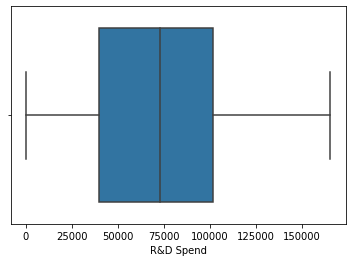

In [11]:
# checking for outliners
sb.boxplot(x=df['R&D Spend'])

In [12]:
# no outliners in 'R&D Spend' attribute

<AxesSubplot:xlabel='Administration'>

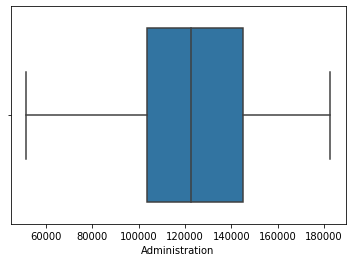

In [13]:
sb.boxplot(x=df['Administration'])

In [14]:
# no outliners in 'Administration' attribute

<AxesSubplot:xlabel='Marketing Spend'>

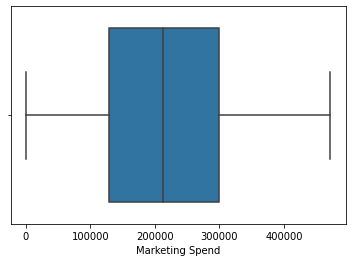

In [15]:
sb.boxplot(x=df['Marketing Spend'])

In [16]:
# no outliners in 'Marketing Spend' attribute

<AxesSubplot:xlabel='State'>

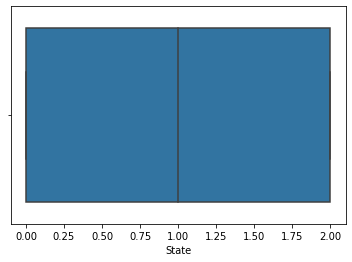

In [17]:
sb.boxplot(x=df['State'])

In [18]:
# no outliners in 'State' attribute

<AxesSubplot:>

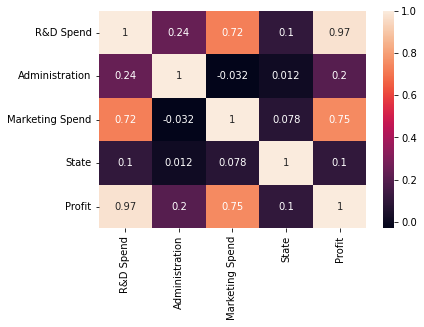

In [19]:
# using Pearson's correlation method
corr = df.corr(method='pearson')
sb.heatmap(corr, annot=True)

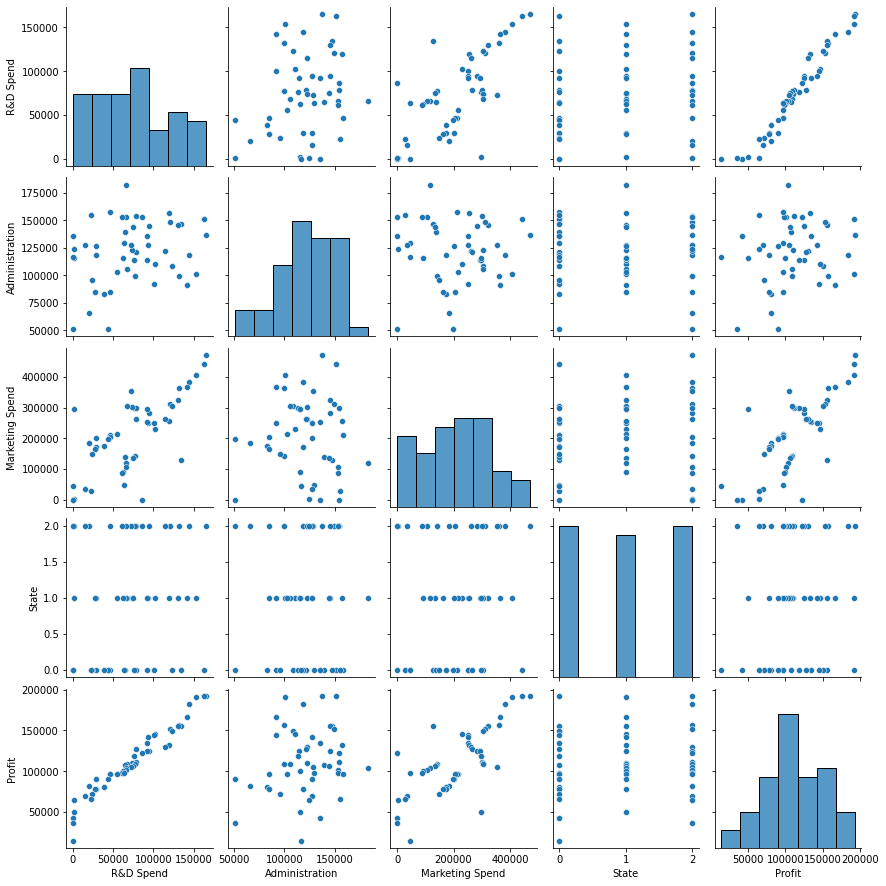

In [20]:
sb.pairplot(df)

In [21]:
# 'Profit' is almost linearly dependent on 'R&D Spend' and 'Marketing Spend'

In [23]:
data = df.values
X,y = data[:,:-1], data[:,-1]
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 0)  # splitting in the ration 80:20

In [24]:
model = RandomForestRegressor(random_state=0)
model.fit(X_train, y_train)

RandomForestRegressor(random_state=0)

In [25]:
y_pred = model.predict(X_test)

In [26]:
model.score(X_test,y_test)

0.9691314428968053


## Predictions are 96.91% accurate.